# Google Merch Store Exploration #2

## Association rule mining

In [1]:
import re
from pprint import pprint
# import sklearn
import pandas as pd
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

Getting Google Merch Store data

In [2]:
from google.cloud import bigquery

In [3]:
client = bigquery.Client.from_service_account_json('forecast-prophet-testing-3df528dba0ca.json')

FileNotFoundError: [Errno 2] No such file or directory: 'forecast-prophet-testing-3df528dba0ca.json'

In [4]:
data_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')
ga_dataset = client.get_dataset(data_ref)

NameError: name 'client' is not defined

In [12]:
# Get an individual table
ga_20170801 = client.get_table(ga_dataset.table('ga_sessions_20170801'))

#### Get all hits

In [21]:
# get data from bigquery
list_of_tables = [x.table_id for x in client.list_tables(ga_dataset)]
table = list_of_tables[0]

query = "SELECT hits FROM `bigquery-public-data.google_analytics_sample.{}`".format(table)

my_job_config = bigquery.job.QueryJobConfig()
my_job_config.dry_run = True

job = client.query(query, location="US")

#### Get totals.transactions

In [230]:
# get data from bigquery
list_of_tables = [x.table_id for x in client.list_tables(ga_dataset)]
table = list_of_tables[0]
# selected_table = client.get_table(ga_dataset.table(table))

# query = "SELECT h.item.productName AS purchased_products,\
#             COUNT(h.item.productName) AS quantity\
#             FROM `bigquery-public-data.google_analytics_sample.{}`,\
#                 UNNEST(hits) as h\
#             WHERE (fullVisitorId IN(\
#                 SELECT fullVisitorId\
#                 FROM `bigquery-public-data.google_analytics_sample.{}`\
#                 WHERE (totals.transactions>=1)\
#             )\
#             AND h.item.productName IS NOT NULL)\
#             GROUP BY purchased_products\
#             ORDER BY quantity DESC;\
#         ".format(table, table)

# query = "SELECT fullVisitorId as Name, h.item.productName as Product\
#         FROM `bigquery-public-data.google_analytics_sample.{}`,\
#             UNNEST(hits) as h\
#         WHERE fullVisitorId IN (\
#             SELECT fullVisitorId FROM\
#             `bigquery-public-data.google_analytics_sample.{}`\
#             WHERE totals.transactions>=1\
#         ) AND h.item.productName IS NOT NULL\
#         GROUP BY Name, Product\
#         ".format(table, table)

query = "SELECT h.item.productName AS other_purchased_products,\
    COUNT(h.item.productName) AS quantity\
    FROM `bigquery-public-data.google_analytics_sample.{}`,\
        UNNEST(hits) as h\
    WHERE fullVisitorId IN (\
      SELECT fullVisitorId\
      FROM `bigquery-public-data.google_analytics_sample.{}`,\
          UNNEST(hits) as h\
      WHERE h.item.productName CONTAINS 'Product Item Name A'\
       AND totals.transactions>=1\
      GROUP BY fullVisitorId )\
     AND h.item.productName IS NOT NULL\
     AND h.item.productName != 'Product Item Name A'\
    GROUP BY other_purchased_products\
    ORDER BY quantity DESC;".format(table, table)

my_job_config = bigquery.job.QueryJobConfig()
my_job_config.dry_run = True

job_purchases = client.query(query, location="US")

# for row in job.result():
#     pageview_result = row[0]

#     df_pageviews_2.loc[j, 'pageviews'] = pageview_result
#     df_pageviews_2.loc[j, 'date'] = table


In [ ]:
# query = "SELECT hits.item.productName AS purchased_products FROM `bigquery-public-data.google_analytics_sample.{}` WHERE (totals.transactions>=1 AND hits.item.productName IS NOT NULL)"

In [227]:
job_purchases.result()

In [228]:
result_list = [x for x in job_purchases.result()]

In [229]:
result_list

[]

In [208]:
# 34 users purchased something
len(result_list)

34

In [177]:
for row in result_list:
#     if row['trans_count'] != None and row['purchased_products'] != None:
    if row['trans_count'] != None:
        print(row['trans_count'], row['trans_rev'], row['purchased_products'])

1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 7990000 None
1 7990000 None
1 7990000 None
1 7990000 None
1 7990000 None
1 7990000 None
1 7990000 None
1 7990000 None
1 7990000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 13590000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 16990000 None
1 71700000 None
1 71700000 None
1 71700000 None
1 71700000 None
1 71700000 None
1 71700000 None
1 71700000 None
1 71700000 None
1 71700000 None
1 71700000 None
1 71700000 None
1

In [176]:
len(result_list)

13006

In [86]:
for j in range(0, len(result_list)):
    
    for i in range(0, len(result_list[j][0])):
        pprint(result_list[j][0][i]['transaction'])

None
{'affiliation': None,
 'currencyCode': 'USD',
 'localTransactionRevenue': None,
 'localTransactionShipping': None,
 'localTransactionTax': None,
 'transactionCoupon': None,
 'transactionId': None,
 'transactionRevenue': None,
 'transactionShipping': None,
 'transactionTax': None}
None
None
{'affiliation': None,
 'currencyCode': 'USD',
 'localTransactionRevenue': None,
 'localTransactionShipping': None,
 'localTransactionTax': None,
 'transactionCoupon': None,
 'transactionId': None,
 'transactionRevenue': None,
 'transactionShipping': None,
 'transactionTax': None}
{'affiliation': None,
 'currencyCode': 'USD',
 'localTransactionRevenue': None,
 'localTransactionShipping': None,
 'localTransactionTax': None,
 'transactionCoupon': None,
 'transactionId': None,
 'transactionRevenue': None,
 'transactionShipping': None,
 'transactionTax': None}
None
None
{'affiliation': None,
 'currencyCode': 'USD',
 'localTransactionRevenue': None,
 'localTransactionShipping': None,
 'localTransactio

In [321]:
df_user_transactions

fullVisitorId  visitNumber       visitId  visits  hits  transactions  \
0  0000213131142648941          1.0  1.493419e+09     1.0  14.0           1.0   

   totalTransactionRevenue  hitNumber              pageTitle     productName  \
0               39590000.0       13.0  Checkout Confirmation  BLM Sweatshirt   

  productCategory  productRevenue    transactionId  transactionRevenue  \
0         Apparel      39590000.0  ORD201704282043          39590000.0   

   eventAction  
0          NaN

In [276]:
job.result()

In [320]:
df_user_transactions1

fullVisitorId  visitNumber       visitId  visits  hits  \
0      9998996003043230595          1.0  1.479360e+09     1.0  16.0   
1      9998996003043230595          1.0  1.479360e+09     1.0  16.0   
2      9998597322098588317          1.0  1.470086e+09     1.0  37.0   
3      9998597322098588317          1.0  1.470086e+09     1.0  37.0   
4      9997409246962677759          2.0  1.481251e+09     1.0  86.0   
5      9997409246962677759          2.0  1.481251e+09     1.0  86.0   
6      9997409246962677759          2.0  1.481251e+09     1.0  86.0   
7      9997409246962677759          2.0  1.481251e+09     1.0  86.0   
8      9997409246962677759          2.0  1.481251e+09     1.0  86.0   
9      9994767073213036303          6.0  1.470773e+09     1.0  42.0   
10     9994767073213036303          6.0  1.470773e+09     1.0  42.0   
11     9994767073213036303          6.0  1.470773e+09     1.0  42.0   
12     9994767073213036303          6.0  1.470773e+09     1.0  42.0   
13     9994767073213036303          6.0  1.470773e+09     1.0  42.0   
14     9994767073213036303          6.0  1.470773e+09     1.0  42.0   
15     9991633376050115277          1.0  1.487377e+09     1.0  17.0   
16     9990797196896345494          1.0  1.492782e+09     1.0  40.0   
17     9990797196896345494          1.0  1.492782e+09     1.0  40.0   
18     9990797196896345494          1.0  1.492782e+09     1.0  40.0   
19     9990183617359422098          1.0  1.490898e+09     1.0  20.0   
20     9990183617359422098          1.0  1.490898e+09     1.0  20.0   
21     9990183617359422098          6.0  1.493325e+09     1.0  25.0   
22     9990183617359422098          6.0  1.493325e+09     1.0  25.0   
23     9990183617359422098          6.0  1.493325e+09     1.0  25.0   
24     9989795984216871126          6.0  1.486423e+09     1.0  74.0   
25     9989795984216871126          6.0  1.486423e+09     1.0  74.0   
26     9989795984216871126          6.0  1.486423e+09     1.0  74.0   
27     9989795984216871126          6.0  1.486423e+09     1.0  74.0   
28     9989795984216871126          6.0  1.486423e+09     1.0  74.0   
29     9989795984216871126          6.0  1.486423e+09     1.0  74.0   
...                    ...          ...           ...     ...   ...   
36788   001905118576359487          5.0  1.476722e+09     1.0  26.0   
36789  0018400544049332170          1.0  1.489643e+09     1.0  25.0   
36790  0018400544049332170          1.0  1.489643e+09     1.0  25.0   
36791  0018386080117189534          2.0  1.489028e+09     1.0  19.0   
36792  0015950283479889703          4.0  1.488149e+09     1.0  19.0   
36793  0014262055593378383          3.0  1.498605e+09     1.0  11.0   
36794  0014262055593378383          4.0  1.499124e+09     1.0  40.0   
36795  0014262055593378383          4.0  1.499124e+09     1.0  40.0   
36796  0014262055593378383          4.0  1.499124e+09     1.0  40.0   
36797  0014262055593378383          6.0  1.500139e+09     1.0  35.0   
36798  0014262055593378383          6.0  1.500139e+09     1.0  35.0   
36799  0014253006455543633          1.0  1.487545e+09     1.0  19.0   
36800  0013296981549010416          1.0  1.492824e+09     1.0  26.0   
36801  0012561433643490595          3.0  1.496461e+09     1.0  37.0   
36802  0012561433643490595          3.0  1.496461e+09     1.0  37.0   
36803  0010295111715775250          3.0  1.501550e+09     1.0  44.0   
36804  0007933257389091624          1.0  1.493664e+09     1.0  18.0   
36805  0007617910709180468          3.0  1.481560e+09     1.0  15.0   
36806  0006911334202687206          2.0  1.500442e+09     1.0  23.0   
36807  0006911334202687206          2.0  1.500442e+09     1.0  23.0   
36808   000435324061339869          2.0  1.477014e+09     1.0  14.0   
36809  0003961110741104601          2.0  1.495426e+09     1.0  26.0   
36810  0003961110741104601          2.0  1.495426e+09     1.0  26.0   
36811  0003450834640354121          8.0  1.476826e+09     1.0  94.0   
36812  0003450834640354121          8

In [298]:
user_list = df_user_transactions1['fullVisitorId'].unique().tolist()

In [317]:
df_itemsets_by_user = df_user_transactions1.groupby('fullVisitorId')['productName'].apply(list).to_frame()

In [318]:
df_itemsets_by_user

productName
fullVisitorId                                                         
0000213131142648941                                   [BLM Sweatshirt]
0002871498069867123                     [Google Metallic Notebook Set]
0003450834640354121  [Google Laptop and Cell Phone Stickers, YouTub...
0003961110741104601  [YouTube Custom Decals, Google Laptop and Cell...
000435324061339869                          [Google Men's  Zip Hoodie]
0006911334202687206  [Google Women's Yoga Jacket Black, YouTube RFI...
0007617910709180468               [YouTube Youth Short Sleeve Tee Red]
0007933257389091624                                   [BLM Sweatshirt]
0010295111715775250                        [Google 22 oz Water Bottle]
0012561433643490595              [Google Kick Ball, Google Sunglasses]
0013296981549010416       [Google Women's Short Sleeve Hero Tee White]
0014253006455543633              [YouTube Women's Fleece Hoodie Black]
0014262055593378383  [Google Women's Short Sleeve Badge Tee Navy, G...
0015950283479889703                               [Recycled Mouse Pad]
0018386080117189534                                 [Google Twill Cap]
0018400544049332170  [Recycled Mouse Pad, Android BTTF Moonshot Gra...
001905118576359487   [Android BTTF Cosmos Graphic Tee, Keyboard DOT...
0020342483972052451  [Google 22 oz Water Bottle, 22 oz Android Bott...
0020502892485275044  [22 oz Android Bottle, Google Insulated Stainl...
0021939395292136520  [Four Color Retractable Pen, Leatherette Journ...
0024314485741511650  [Google Laptop Backpack, Google Men's  Zip Hoo...
0024725579067754075                      [Engraved Ceramic Google Mug]
0024932550342595467  [Google Men's Short Sleeve Performance Badge T...
0026203741366904270                        [Google 22 oz Water Bottle]
0026329820781202527  [Google Men's Vintage Badge Tee Sage, 26 oz Do...
0027729301290398668  [Google Men's 100% Cotton Short Sleeve Hero Te...
002838359588704338              [24 oz YouTube Sergeant Stripe Bottle]
0032285388804234573        [Google 22 oz Water Bottle, Windup Android]
0032288790526152703                               [Google Trucker Hat]
0035322769016923863  [Google Men's 100% Cotton Short Sleeve Hero Te...
...                                                                ...
9972597816595372004  [Google 40 oz Insulated Monster Bottle, Google...
9972641923092309898  [YouTube Men's Fleece Hoodie Black, YouTube Tw...
997271511212133268   [Google Hard Cover Journal, Google Leather Jou...
9973195165804180005                                         [Maze Pen]
9973665079624172058  [Metal Texture Roller Pen, Google Rucksack, Go...
9974232250427988367  [Electronics Accessory Pouch, Collapsible Shop...
9974351919673138742  [Google RFID Journal, Android RFID Journal, Go...
9974461982959135812                                 [Insulated Bottle]
9975702176622548240  [Google Men's 100% Cotton Short Sleeve Hero Te...
9976366744327936965  [Google Men's  Zip Hoodie, Google Women's Ligh...
9977123823906435841  [Google Women's Short Sleeve Hero Tee Red Heat...
9979550771372989715                     [Android Stretch Fit Hat L/XL]
9979979376705372624               [YouTube Youth Short Sleeve Tee Red]
9980323391675823795  [Google Women's Short Sleeve Shirt Blue, 23 oz...
9981562221973608723  [Electronics Accessory Pouch, Ballpoint Stylus...
9982117639715718754  [Google Twill Cap, Google Men's 100% Cotton Sh...
9982700667464896535                                   [BLM Sweatshirt]
9982895886072793603                     [Google Tri-blend Hoodie Grey]
99879093370825436                                  [Google Sunglasses]
9988272152672987767  [Windup Android, YouTube Leatherette Notebook ...
9988700586657346958             [Google Men's Vintage Badge Tee Green]
9989256027389985761  [Google Men's  Zip Hoodie, Keyboard DOT Sticke...
9989795984216871126  [Google Men's Vintage Tank, Google Vintage Hen...
9990183617359422098  [Windup Android, Android 17oz Stainless Steel ...
999079719689

In [316]:
from pprint import pprint
pprint(df_itemsets_by_user)

{'0000213131142648941': ['BLM Sweatshirt'],
 '0002871498069867123': ['Google Metallic Notebook Set'],
 '0003450834640354121': ['Google Laptop and Cell Phone Stickers',
                         'YouTube Custom Decals',
                         'YouTube Leatherette Notebook Combo',
                         "YouTube Men's Vintage Henley",
                         "Google Men's 100% Cotton Short Sleeve Hero Tee "
                         'White'],
 '0003961110741104601': ['YouTube Custom Decals',
                         'Google Laptop and Cell Phone Stickers'],
 '000435324061339869': ["Google Men's  Zip Hoodie"],
 '0006911334202687206': ["Google Women's Yoga Jacket Black",
                         'YouTube RFID Journal'],
 '0007617910709180468': ['YouTube Youth Short Sleeve Tee Red'],
 '0007933257389091624': ['BLM Sweatshirt'],
 '0010295111715775250': ['Google 22 oz Water Bottle'],
 '0012561433643490595': ['Google Kick Ball', 'Google Sunglasses'],
 '0013296981549010416': ["Google Women's 

In [293]:
df_user_transactions1[['fullVisitorId', 'productName']]

fullVisitorId                                        productName
0      9998996003043230595                   Google Vintage Henley Grey/Black
1      9998996003043230595                       Android Men's Vintage Henley
2      9998597322098588317                  PaperMate Ink Joy Retractable Pen
3      9998597322098588317                                       Badge Holder
4      9997409246962677759                               Crunch Noise Dog Toy
5      9997409246962677759                                           Maze Pen
6      9997409246962677759                                   Google Twill Cap
7      9997409246962677759   Google Women's Short Sleeve Performance Tee Navy
8      9997409246962677759                            Color Changing Grip Pen
9      9994767073213036303                        Electronics Accessory Pouch
10     9994767073213036303                      23 oz Wide Mouth Sport Bottle
11     9994767073213036303                            16 oz. Hot/Cold Tumbler
12     9994767073213036303                                  Google Power Bank
13     9994767073213036303              Google Laptop and Cell Phone Stickers
14     9994767073213036303                 Blue Keeper Notebook Set with Flap
15     9991633376050115277                                     BLM Sweatshirt
16     9990797196896345494                           Metal Texture Roller Pen
17     9990797196896345494                       Switch Tone Color Crayon Pen
18     9990797196896345494                       Google Car Clip Phone Holder
19     9990183617359422098                                     Windup Android
20     9990183617359422098          Android 17oz Stainless Steel Sport Bottle
21     9990183617359422098                                 Google 5-Panel Cap
22     9990183617359422098                     Google Collapsible Duffel Blue
23     9990183617359422098                    Google Collapsible Duffel Black
24     9989795984216871126                          Google Men's Vintage Tank
25     9989795984216871126                   Google Vintage Henley Grey/Black
26     9989795984216871126                                     Windup Android
27     9989795984216871126                   Google Toddler Hoodie Royal Blue
28     9989795984216871126                       Google Women's Fleece Hoodie
29     9989795984216871126                           Google Men's  Zip Hoodie
...                    ...                                                ...
36788   001905118576359487                               Keyboard DOT Sticker
36789  0018400544049332170                                 Recycled Mouse Pad
36790  0018400544049332170                  Android BTTF Moonshot Graphic Tee
36791  0018386080117189534                                   Google Twill Cap
36792  0015950283479889703                                 Recycled Mouse Pad
36793  0014262055593378383         Google Women's Short Sleeve Badge Tee Navy
36794  0014262055593378383               Google Men's Vintage Badge Tee Black
36795  0014262055593378383  Google Women's Long Sleeve Blended Cardigan Ch...
36796  0014262055593378383  Google Men's 100% Cotton Short Sleeve Hero Tee...
36797  0014262055593378383                     Google Slim Utility Travel Bag
36798  0014262055593378383                                   Google Lunch Bag
36799  0014253006455543633                YouTube Women's Fleece Hoodie Black
36800  0013296981549010416         Google Women's Short Sleeve Hero Tee White
36801  0012561433643490595                                   Google Kick Ball
36802  0012561433643490595                                  Google Sunglasses
36803  0010295111715775250                          Google 22 oz Water Bottle
36804  0007933257389091624                                     BLM Sweatshirt
36805  0007617910709180468                 YouTube Youth Short Sleeve Tee Red
36806  0006911334202687206                   Google Women's Yoga Jacket Black
36807  0006911334202687206         

In [279]:
df_user_transactions1 = pd.DataFrame()
counter = 0
for row in job.result():
    df_user_transactions1.loc[counter, 'fullVisitorId'] = row[0]
    df_user_transactions1.loc[counter, 'visitNumber'] = row[1]
    df_user_transactions1.loc[counter, 'visitId'] = row[2]
    df_user_transactions1.loc[counter, 'visits'] = row[3]
    df_user_transactions1.loc[counter, 'hits'] = row[4]
    df_user_transactions1.loc[counter, 'transactions'] = row[5]
    df_user_transactions1.loc[counter, 'totalTransactionRevenue'] = row[6]
    df_user_transactions1.loc[counter, 'hitNumber'] = row[7]
    df_user_transactions1.loc[counter, 'pageTitle'] = row[8]
    df_user_transactions1.loc[counter, 'productName'] = row[9]
    df_user_transactions1.loc[counter, 'productCategory'] = row[10]
    df_user_transactions1.loc[counter, 'productRevenue'] = row[11]
    df_user_transactions1.loc[counter, 'transactionId'] = row[12]
    df_user_transactions1.loc[counter, 'transactionRevenue'] = row[13]
    df_user_transactions1.loc[counter, 'eventAction'] = row[14]
    
    counter += 1
    print(counter)
print(counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
df_user_transactions1

In [268]:
# get data from bigquery
df_user_transactions = pd.DataFrame()

list_of_tables = [x.table_id for x in client.list_tables(ga_dataset)]

# Iterate through each table (each is different date)
for j in tqdm(range(0, len(list_of_tables))):
    
    table = list_of_tables[j]
    selected_table = client.get_table(ga_dataset.table(table))

    query = "SELECT\
                fullVisitorId, visitNumber, visitId, totals.visits, totals.hits,\
                totals.transactions, totals.totalTransactionRevenue, h.hitNumber,\
                h.page.pageTitle, p.v2ProductName, p.v2ProductCategory, p.productRevenue,\
                h.transaction.transactionId, h.transaction.transactionRevenue, h.eventInfo.eventAction\
            FROM\
                `bigquery-public-data.google_analytics_sample.ga_sessions_*`,\
                UNNEST(hits) AS h, UNNEST(h.product) AS p\
            WHERE\
                totals.transactions >=1 AND h.transaction.transactionId IS NOT NULL\
                AND p.productRevenue IS NOT NULL\
            ORDER BY fullVisitorId DESC;".format(table)

    my_job_config = bigquery.job.QueryJobConfig()
    my_job_config.dry_run = True

    job = client.query(query, location="US")
    print('Got here 1')
    
#     rlist = [x for x in job.result()]
#     print(rlist)
    
    for row in tqdm(job.result()):
        df_user_transactions.loc[j, 'fullVisitorId'] = row[0]
        df_user_transactions.loc[j, 'visitNumber'] = row[1]
        df_user_transactions.loc[j, 'visitId'] = row[2]
        df_user_transactions.loc[j, 'visits'] = row[3]
        df_user_transactions.loc[j, 'hits'] = row[4]
        df_user_transactions.loc[j, 'transactions'] = row[5]
        df_user_transactions.loc[j, 'totalTransactionRevenue'] = row[6]
        df_user_transactions.loc[j, 'hitNumber'] = row[7]
        df_user_transactions.loc[j, 'pageTitle'] = row[8]
        df_user_transactions.loc[j, 'productName'] = row[9]
        df_user_transactions.loc[j, 'productCategory'] = row[10]
        df_user_transactions.loc[j, 'productRevenue'] = row[11]
        df_user_transactions.loc[j, 'transactionId'] = row[12]
        df_user_transactions.loc[j, 'transactionRevenue'] = row[13]
        df_user_transactions.loc[j, 'eventAction'] = row[14]
        
    break
        
        
    


  0%|          | 0/366 [00:00<?, ?it/s]

Got here 1




0it [00:00, ?it/s]
1it [00:03,  3.82s/it]
17it [00:03,  4.33it/s]
35it [00:04,  8.70it/s]
54it [00:04, 13.08it/s]
72it [00:04, 17.02it/s]
91it [00:04, 20.99it/s]
109it [00:04, 24.58it/s]
128it [00:04, 28.21it/s]
145it [00:04, 31.27it/s]
162it [00:04, 34.14it/s]
179it [00:04, 36.91it/s]
196it [00:04, 39.57it/s]
214it [00:05, 42.35it/s]
233it [00:05, 45.17it/s]
253it [00:05, 48.12it/s]
272it [00:05, 50.76it/s]
292it [00:05, 53.46it/s]
312it [00:05, 56.08it/s]
331it [00:05, 58.35it/s]
350it [00:05, 60.57it/s]
369it [00:05, 62.72it/s]
388it [00:05, 64.70it/s]
406it [00:06, 66.38it/s]
423it [00:06, 67.80it/s]
442it [00:06, 69.70it/s]
462it [00:06, 71.67it/s]
480it [00:06, 73.30it/s]
499it [00:06, 75.03it/s]
518it [00:06, 76.70it/s]
537it [00:06, 78.18it/s]
556it [00:06, 79.78it/s]
575it [00:07, 81.29it/s]
594it [00:07, 82.73it/s]
614it [00:07, 84.32it/s]
633it [00:07, 85.68it/s]
652it [00:07, 86.75it/s]
671it [00:07, 88.06it/s]
689it [00:07, 89.21it/s]
707it [00:07, 90.14it/s]
724it [00:0

In [243]:
job = client.query(query, location='US')
rlist = [x for x in job.result()]

In [261]:
df_user_transactions = pd.DataFrame()

for row in job.result():
    for j in tqdm(range(0, len(list_of_tables))):
        fullVisitorId = row[0]
        visitNumber = row[1]
        visitId = row[2]
        visits = row[3]
        hits = row[4]
        transactions = row[5]
        totalTransactionRevenue = row[6]
        hitNumber = row[7]
        pageTitle = row[8]
        productName = row[9]
        productCategory = row[10]
        productRevenue = row[11]
        transactionId = row[12]
        transactionRevenue = row[13]
        eventAction = row[14]
        
        df_user_transactions.loc[j, 'fullVisitorId'] = row[0]
        df_user_transactions.loc[j, 'visitNumber'] = row[1]
        df_user_transactions.loc[j, 'visitId'] = row[2]
        df_user_transactions.loc[j, 'visits'] = row[3]
        df_user_transactions.loc[j, 'hits'] = row[4]
        df_user_transactions.loc[j, 'transactions'] = row[5]
        df_user_transactions.loc[j, 'totalTransactionRevenue'] = row[6]
        df_user_transactions.loc[j, 'hitNumber'] = row[7]
        df_user_transactions.loc[j, 'pageTitle'] = row[8]
        df_user_transactions.loc[j, 'productName'] = row[9]
        df_user_transactions.loc[j, 'productCategory'] = row[10]
        df_user_transactions.loc[j, 'productRevenue'] = row[11]
        df_user_transactions.loc[j, 'transactionId'] = row[12]
        df_user_transactions.loc[j, 'transactionRevenue'] = row[13]
        df_user_transactions.loc[j, 'eventAction'] = row[14]
        
        break

    break 

  0%|          | 0/366 [00:00<?, ?it/s]


In [319]:
df_user_transactions

fullVisitorId  visitNumber       visitId  visits  hits  transactions  \
0  0000213131142648941          1.0  1.493419e+09     1.0  14.0           1.0   

   totalTransactionRevenue  hitNumber              pageTitle     productName  \
0               39590000.0       13.0  Checkout Confirmation  BLM Sweatshirt   

  productCategory  productRevenue    transactionId  transactionRevenue  \
0         Apparel      39590000.0  ORD201704282043          39590000.0   

   eventAction  
0          NaN

### Exploring user itemsets

In [353]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [322]:
df_itemsets_by_user

productName
fullVisitorId                                                         
0000213131142648941                                   [BLM Sweatshirt]
0002871498069867123                     [Google Metallic Notebook Set]
0003450834640354121  [Google Laptop and Cell Phone Stickers, YouTub...
0003961110741104601  [YouTube Custom Decals, Google Laptop and Cell...
000435324061339869                          [Google Men's  Zip Hoodie]
0006911334202687206  [Google Women's Yoga Jacket Black, YouTube RFI...
0007617910709180468               [YouTube Youth Short Sleeve Tee Red]
0007933257389091624                                   [BLM Sweatshirt]
0010295111715775250                        [Google 22 oz Water Bottle]
0012561433643490595              [Google Kick Ball, Google Sunglasses]
0013296981549010416       [Google Women's Short Sleeve Hero Tee White]
0014253006455543633              [YouTube Women's Fleece Hoodie Black]
0014262055593378383  [Google Women's Short Sleeve Badge Tee Navy, G...
0015950283479889703                               [Recycled Mouse Pad]
0018386080117189534                                 [Google Twill Cap]
0018400544049332170  [Recycled Mouse Pad, Android BTTF Moonshot Gra...
001905118576359487   [Android BTTF Cosmos Graphic Tee, Keyboard DOT...
0020342483972052451  [Google 22 oz Water Bottle, 22 oz Android Bott...
0020502892485275044  [22 oz Android Bottle, Google Insulated Stainl...
0021939395292136520  [Four Color Retractable Pen, Leatherette Journ...
0024314485741511650  [Google Laptop Backpack, Google Men's  Zip Hoo...
0024725579067754075                      [Engraved Ceramic Google Mug]
0024932550342595467  [Google Men's Short Sleeve Performance Badge T...
0026203741366904270                        [Google 22 oz Water Bottle]
0026329820781202527  [Google Men's Vintage Badge Tee Sage, 26 oz Do...
0027729301290398668  [Google Men's 100% Cotton Short Sleeve Hero Te...
002838359588704338              [24 oz YouTube Sergeant Stripe Bottle]
0032285388804234573        [Google 22 oz Water Bottle, Windup Android]
0032288790526152703                               [Google Trucker Hat]
0035322769016923863  [Google Men's 100% Cotton Short Sleeve Hero Te...
...                                                                ...
9972597816595372004  [Google 40 oz Insulated Monster Bottle, Google...
9972641923092309898  [YouTube Men's Fleece Hoodie Black, YouTube Tw...
997271511212133268   [Google Hard Cover Journal, Google Leather Jou...
9973195165804180005                                         [Maze Pen]
9973665079624172058  [Metal Texture Roller Pen, Google Rucksack, Go...
9974232250427988367  [Electronics Accessory Pouch, Collapsible Shop...
9974351919673138742  [Google RFID Journal, Android RFID Journal, Go...
9974461982959135812                                 [Insulated Bottle]
9975702176622548240  [Google Men's 100% Cotton Short Sleeve Hero Te...
9976366744327936965  [Google Men's  Zip Hoodie, Google Women's Ligh...
9977123823906435841  [Google Women's Short Sleeve Hero Tee Red Heat...
9979550771372989715                     [Android Stretch Fit Hat L/XL]
9979979376705372624               [YouTube Youth Short Sleeve Tee Red]
9980323391675823795  [Google Women's Short Sleeve Shirt Blue, 23 oz...
9981562221973608723  [Electronics Accessory Pouch, Ballpoint Stylus...
9982117639715718754  [Google Twill Cap, Google Men's 100% Cotton Sh...
9982700667464896535                                   [BLM Sweatshirt]
9982895886072793603                     [Google Tri-blend Hoodie Grey]
99879093370825436                                  [Google Sunglasses]
9988272152672987767  [Windup Android, YouTube Leatherette Notebook ...
9988700586657346958             [Google Men's Vintage Badge Tee Green]
9989256027389985761  [Google Men's  Zip Hoodie, Keyboard DOT Sticke...
9989795984216871126  [Google Men's Vintage Tank, Google Vintage Hen...
9990183617359422098  [Windup Android, Android 17oz Stainless Steel ...
999079719689

**Quick look at top purchased items**

In [349]:
df_user_transactions1['productName'].value_counts().to_frame()[:15]

productName
Google Sunglasses                                          1364
Google Laptop and Cell Phone Stickers                       788
Google 22 oz Water Bottle                                   784
Google Men's 100% Cotton Short Sleeve Hero Tee ...          760
Google Men's 100% Cotton Short Sleeve Hero Tee ...          715
Google Men's 100% Cotton Short Sleeve Hero Tee ...          561
Google Men's  Zip Hoodie                                    468
Recycled Paper Journal Set                                  431
BLM Sweatshirt                                              405
Engraved Ceramic Google Mug                                 400
Google Twill Cap                                            396
26 oz Double Wall Insulated Bottle                          394
Google Men's Vintage Badge Tee Black                        385
Google Men's 100% Cotton Short Sleeve Hero Tee Red          364
Red Shine 15 oz Mug                                         356

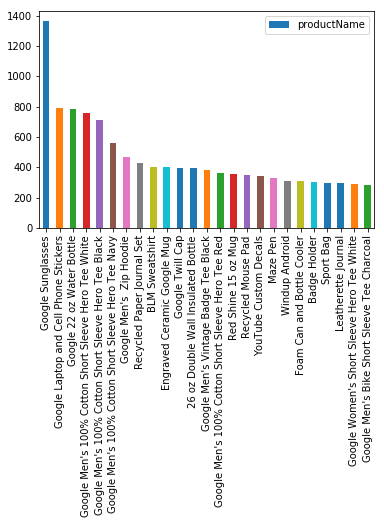

In [352]:
df_user_transactions1['productName'].value_counts().to_frame()[:25].plot.bar(y='productName')

In [ ]:
type(df_)

In [356]:
df_itemsets_by_user.head()

productName
fullVisitorId                                                         
0000213131142648941                                   [BLM Sweatshirt]
0002871498069867123                     [Google Metallic Notebook Set]
0003450834640354121  [Google Laptop and Cell Phone Stickers, YouTub...
0003961110741104601  [YouTube Custom Decals, Google Laptop and Cell...
000435324061339869                          [Google Men's  Zip Hoodie]

In [359]:
transactions = df_itemsets_by_user['productName'].tolist()

In [363]:
te=TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [371]:
df_transactions.head()

1 oz Hand Sanitizer  16 oz. Hot and Cold Tumbler  16 oz. Hot/Cold Tumbler  \
0                False                        False                    False   
1                False                        False                    False   
2                False                        False                    False   
3                False                        False                    False   
4                False                        False                    False   

   20 oz Stainless Steel Insulated Tumbler  22 oz Android Bottle  \
0                                    False                 False   
1                                    False                 False   
2                                    False                 False   
3                                    False                 False   
4                                    False                 False   

   22 oz Mini Mountain Bottle  22 oz YouTube Bottle Infuser  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   23 oz Wide Mouth Sport Bottle  24 oz USA Made Aluminum Bottle  \
0                          False                           False   
1                          False                           False   
2                          False                           False   
3                          False                           False   
4                          False                           False   

   24 oz YouTube Sergeant Stripe Bottle                 ...                  \
0                                 False                 ...                   
1                                 False                 ...                   
2                                 False                 ...                   
3                                 False                 ...                   
4                                 False                 ...                   

   YouTube Women's Fleece Hoodie Black  YouTube Women's Racer Back Tank Black  \
0                                False                                  False   
1                                False                                  False   
2                                False                                  False   
3                                False                                  False   
4                                False                                  False   

   YouTube Women's S/S Crew Tee  YouTube Women's Short Sleeve Crew Tee  \
0                         False                                  False   
1                         False                                  False   
2                         False                                  False   
3                         False                                  False   
4                         False                                  False   

   YouTube Women's Short Sleeve Hero Tee Charcoal  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal  \
0                                              False           
1                                              False           
2                                              False           
3                                              False           
4                                              False           

   YouTube Women's Short Sleeve Tri-blend Badge Tee Grey  \
0                                              False       
1                                              False       
2                                 

In [373]:
apriori(df_transactions, min_support=0.01).head(10)

support itemsets
0  0.016166      (0)
1  0.016366      (3)
2  0.017364      (4)
3  0.010678      (6)
4  0.017264      (9)
5  0.037122     (12)
6  0.011376     (14)
7  0.021355     (15)
8  0.020158     (62)
9  0.019858     (64)